# Intake-ESM
https://intake-esm.readthedocs.io/en/latest/notebooks/tutorial.html

In [1]:
import intake

/data/mlalande/miniconda3/envs/intake_v0/lib/python3.8/site-packages/fastprogress/fastprogress.py:102: UserWarning: Couldn't import ipywidgets properly, progress bar will use console behavior
  warn("Couldn't import ipywidgets properly, progress bar will use console behavior")


In [2]:
url = "/thredds/ipsl/glipsl/ESPRI-CMIP6-test-collection.json"
col = intake.open_esm_datastore(url)
col

,unique
activity_id,16
institution_id,32
source_id,63
experiment_id,101
member_id,4382
table_id,39
variable_id,1029
grid_label,11
time_range,32326
path,2451002


In [4]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,piClim-aer,r1i1p1f1,AERmon,cdnc,gn,185001-188012,/bdd/CMIP6/AerChemMIP/BCC/BCC-ESM1/piClim-aer/...
1,AerChemMIP,BCC,BCC-ESM1,piClim-aer,r1i1p1f1,AERmon,co,gn,185001-188012,/bdd/CMIP6/AerChemMIP/BCC/BCC-ESM1/piClim-aer/...
2,AerChemMIP,BCC,BCC-ESM1,piClim-aer,r1i1p1f1,AERmon,emilnox,gn,185001-188012,/bdd/CMIP6/AerChemMIP/BCC/BCC-ESM1/piClim-aer/...
3,AerChemMIP,BCC,BCC-ESM1,piClim-aer,r1i1p1f1,AERmon,lossch4,gn,185001-188012,/bdd/CMIP6/AerChemMIP/BCC/BCC-ESM1/piClim-aer/...
4,AerChemMIP,BCC,BCC-ESM1,piClim-aer,r1i1p1f1,AERmon,lossco,gn,185001-188012,/bdd/CMIP6/AerChemMIP/BCC/BCC-ESM1/piClim-aer/...


In [67]:
import pprint

uni_dict = col.unique(["source_id", "experiment_id", "table_id"])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 101,
                   'values': ['1pctCO2', '1pctCO2-bgc', '1pctCO2-rad', 'G1',
                              'G6solar', 'G6sulfur', 'abrupt-0p5xCO2',
                              'abrupt-2xCO2', 'abrupt-4xCO2', 'abrupt-solm4p',
                              'abrupt-solp4p', 'amip', 'amip-4xCO2', 'amip-TIP',
                              'amip-future4K', 'amip-hist', 'amip-lfmip-pObs',
                              'amip-lfmip-pdLC', 'amip-lfmip-rmLC',
                              'amip-lwoff', 'amip-m4K', 'amip-p4K',
                              'amip-p4K-lwoff', 'amip-piForcing', 'aqua-4xCO2',
                              'aqua-control', 'aqua-control-lwoff', 'aqua-p4K',
                              'aqua-p4K-lwoff', 'dcppA-assim', 'dcppA-hindcast',
                              'dcppC-amv-ExTrop-neg', 'dcppC-amv-ExTrop-pos',
                              'dcppC-amv-Trop-neg', 'dcppC-amv-Trop-pos',
                              'dcppC-amv-neg', 'dcp

## Search
For example let's take all models from historical that have the variables:
- tas
- snc
- pr


In [78]:
# Define our query
query = dict(
    experiment_id=['historical'],
    variable_id=['tas', 'snc', 'pr'],
#     table_id=['Amon', 'LImon'] # https://github.com/intake/intake-esm/issues/265
)

col_subset = col.search(require_all_on=["source_id"], **query)

col_subset.df.groupby("source_id")[
    ["experiment_id", "variable_id", "table_id", "member_id"]
].nunique()

,experiment_id,variable_id,table_id,member_id
source_id,,,,
BCC-CSM2-MR,1,3,4,3
BCC-ESM1,1,3,3,3
CAS-ESM2-0,1,3,2,4
CESM2,1,3,5,11
CESM2-FV2,1,3,3,3
CESM2-WACCM,1,3,5,3
CESM2-WACCM-FV2,1,3,3,3
CIESM,1,3,2,3
CNRM-CM6-1,1,3,7,30


## Get data multimodel
Let's get the first member (`r1i1p1f1`) for all the models for the temperature (all models won't be there because some models don't have `r1i1p1f1`, it's just for the example, but I guess we still need to do stuff by hand to get what we want because inhomogeneous data)

In [3]:
cat = col.search(
    experiment_id='historical',
    table_id='Amon',
    variable_id='tas',
    member_id='r1i1p1f1'
)

cat

,unique
activity_id,1
institution_id,26
source_id,41
experiment_id,1
member_id,1
table_id,1
variable_id,1
grid_label,3
time_range,242
path,607


In [4]:
cat.keys()

['CMIP.AS-RCEC.TaiESM1.historical.Amon.gn',
 'CMIP.AWI.AWI-CM-1-1-MR.historical.Amon.gn',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Amon.gr',
 'CMIP.CAS.FGOALS-g3.historical.Amon.gn',
 'CMIP.CCCma.CanESM5.historical.Amon.gn',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn',
 'CMIP.E3SM-Project.E3SM-1-0.historical.Amon.gr',
 'CMIP.E3SM-Project.E3SM-1-1.historical.Amon.gr',
 'CMIP.E3SM-Project.E3SM-1-1-ECA.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg.historical.Amon.gr',
 'CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.historical.Amon.gr',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.historical.Amon.gn',
 'CMIP.HAMMOZ-Consortium.MPI-ESM-1-2-HAM.historical.Amon.gn',
 'CMIP.INM.INM-CM4-8.historical.Amon.gr1',
 'CMIP.INM.INM-CM5-0.historical.Amon.gr1',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr',
 'CMIP.MIROC.MIROC6.historic

In [5]:
dset_dict = cat.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/data/mlalande/miniconda3/envs/intake_v0/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/data/mlalande/miniconda3/envs/intake_v0/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/data/mlalande/miniconda3/envs/intake_v0/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/data/mlalande/miniconda3/envs/intake_v0/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/data/mlalande/miniconda3/envs/intake_v0/lib/pyt

In [6]:
cat.keys()[0]

'CMIP.AS-RCEC.TaiESM1.historical.Amon.gn'

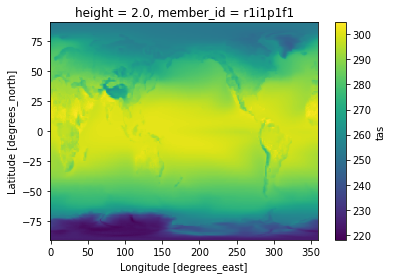

In [41]:
# Ex de plot d'un modèle
period = slice('1979', '2014')
mean = dset_dict[cat.keys()[0]].sel(time=period).tas.mean('time').compute()
mean.plot()

## Get all members from one model

In [42]:
cat = col.search(
    experiment_id="historical",
    table_id="Amon",
    variable_id="tas",
    source_id="IPSL-CM6A-LR"
)

cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,32
table_id,1
variable_id,1
grid_label,1
time_range,1
path,32


In [43]:
# Start dask to load data in parallel?
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:35796 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 7 Cores: 56 Memory: 8.46 GB


In [45]:
cat.keys()

['CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr']

In [ ]:
ds = cat[cat.keys()[0]].to_dask()
# ds

In [ ]:
# Nothing is loaded so far
# ds.tas

In [57]:
%%time
# It's only here we load and compute everythin in parallel
clim = ds.tas.sel(time=period).mean('time').compute() - 273.15

CPU times: user 4.75 s, sys: 767 ms, total: 5.52 s
Wall time: 14.2 s


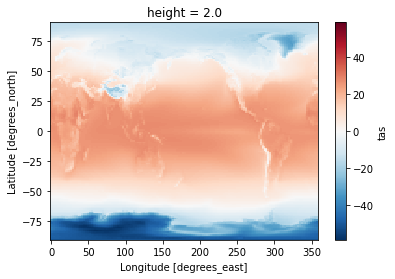

In [65]:
# Ensemble mean
em = clim.mean('member_id')
em.plot()

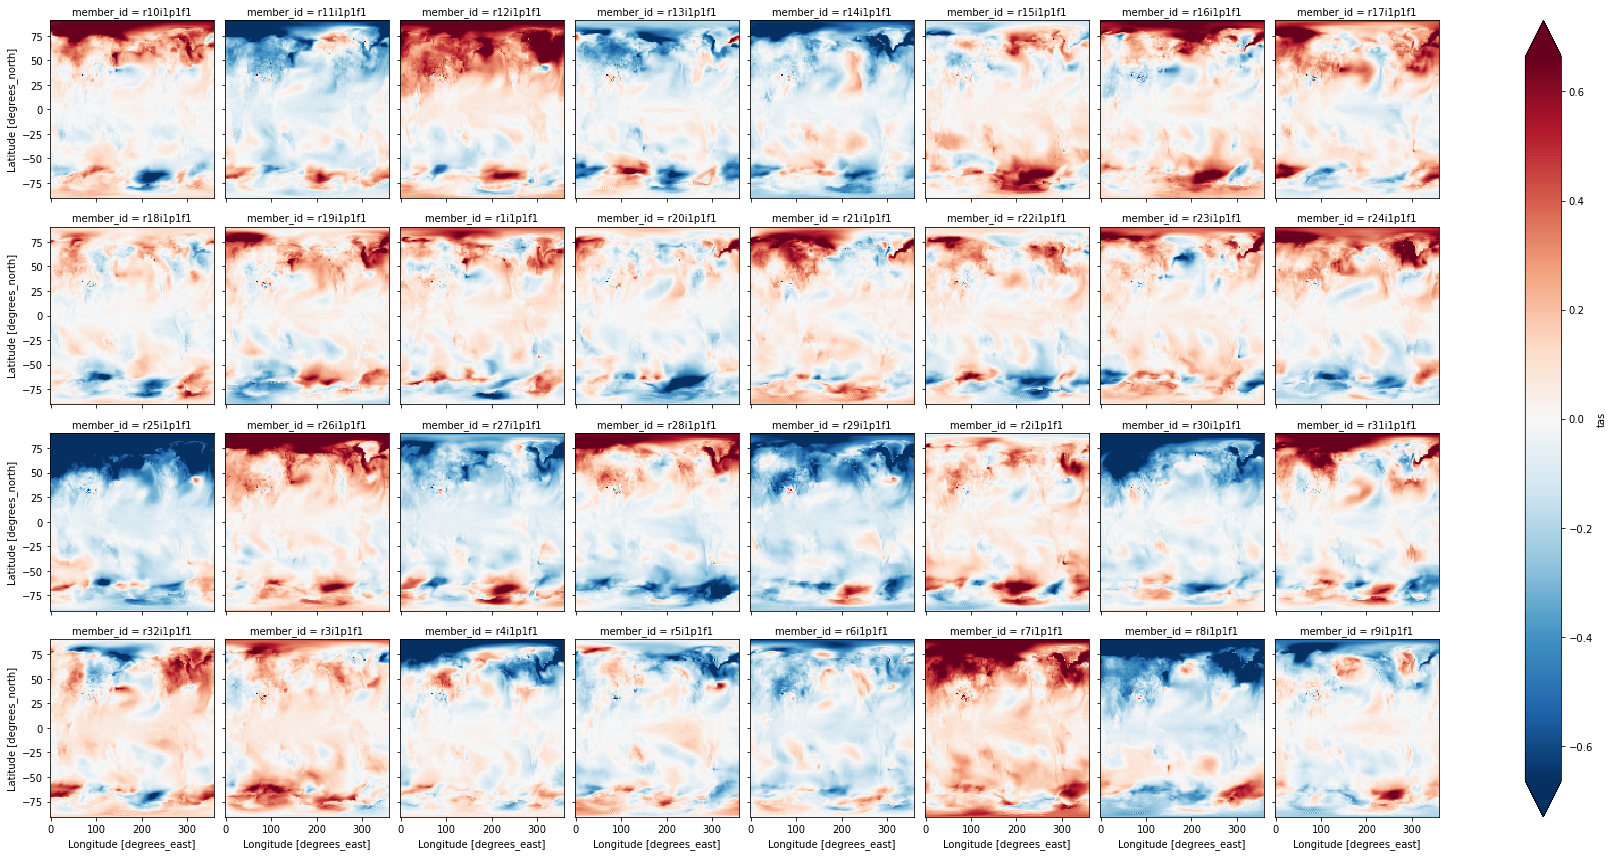

In [67]:
# Plot differences from em
(clim - em).plot(col='member_id', col_wrap=8, robust=True)